In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('parkinsons.data')

# Display the column names in the dataset
print(df.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


AttributeError: 'numpy.int64' object has no attribute 'startswith'

<Figure size 1400x800 with 0 Axes>

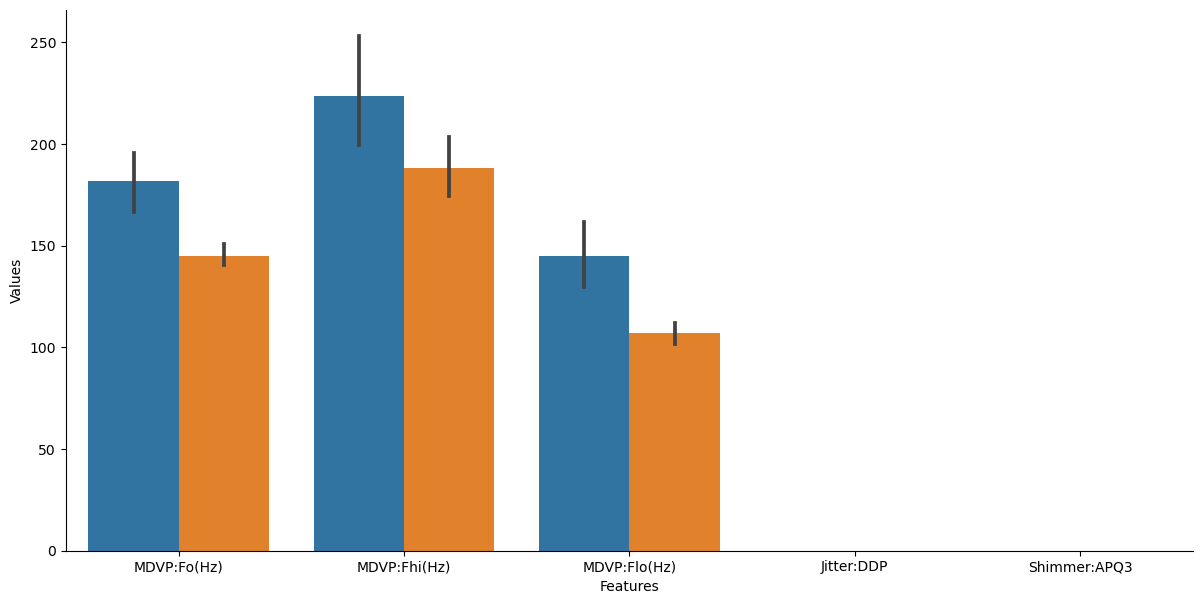

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('parkinsons.data')

# Update the features list with the correct column names from the output above
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'Jitter:DDP', 'Shimmer:APQ3']  # Replace with exact names found

# Reshape the dataframe for seaborn
df_melted = df.melt(id_vars='status', value_vars=features, var_name='Features', value_name='Values')

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.catplot(x='Features', y='Values', hue='status', data=df_melted, kind='bar', height=6, aspect=2)
plt.title('Distribution of Various Features by Status')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('parkinsons.data')

# Display the first few rows of the dataset
print(df.head())

# Split the data into features and target
X = df.drop(columns=['name', 'status'])
y = df['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions with KNN
y_pred_knn = knn.predict(X_test)

# Evaluate KNN model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Initialize and train the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions with SVM
y_pred_svm = svm.predict(X_test)

# Evaluate SVM model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cross_decomposition import PLSRegression

# Load the dataset
df = pd.read_csv('parkinsons.data')

# Display the first few rows of the dataset
print(df.head())

# Split the data into features and target
X = df.drop(columns=['name', 'status'])
y = df['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply LDA for feature selection
lda = LDA(n_components=1)  # Reduce to 1 component (since it's a binary classification)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Print the LDA-transformed features
print("LDA-transformed training features:\n", X_train_lda[:5])  # Show first 5 samples
print("LDA-transformed test features:\n", X_test_lda[:5])  # Show first 5 samples

# Apply PLS for feature selection
pls = PLSRegression(n_components=2)  # Reduce to 2 components
X_train_pls, _ = pls.fit_transform(X_train, y_train)
X_test_pls = pls.transform(X_test)

# Print the PLS-transformed features
print("PLS-transformed training features:\n", X_train_pls[:5])  # Show first 5 samples
print("PLS-transformed test features:\n", X_test_pls[:5])  

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('parkinsons.data')

# Display the first few rows of the dataset
print(df.head())

# Split the data into features and target
X = df.drop(columns=['name', 'status'])
y = df['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PLS for feature selection
pls = PLSRegression(n_components=2)  # Reduce to 2 components
X_train_pls, _ = pls.fit_transform(X_train, y_train)
X_test_pls = pls.transform(X_test)

# Train and evaluate KNN classifier on PLS-transformed data
knn_pls = KNeighborsClassifier(n_neighbors=3)
knn_pls.fit(X_train_pls, y_train)
y_pred_knn_pls = knn_pls.predict(X_test_pls)

# Print PLS + KNN results
print("PLS + KNN Accuracy:", accuracy_score(y_test, y_pred_knn_pls))
print("PLS + KNN Classification Report:\n", classification_report(y_test, y_pred_knn_pls))
print("PLS + KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_pls))

# Train and evaluate SVM classifier on PLS-transformed data
svm_pls = SVC(kernel='linear')
svm_pls.fit(X_train_pls, y_train)
y_pred_svm_pls = svm_pls.predict(X_test_pls)

# Print PLS + SVM results
print("PLS + SVM Accuracy:", accuracy_score(y_test, y_pred_svm_pls))
print("PLS + SVM Classification Report:\n", classification_report(y_test, y_pred_svm_pls))
print("PLS + SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_pls))

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654